# Nate Gentry Global Warming Case Solution

First things first, I imported the relevant library and functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from math import sqrt
import pylab as pl
import seaborn as sns
import scipy.stats as stats

mpl.style.use('fivethirtyeight')
%matplotlib inline

Next I imported the two CSV files with our weather data sets from GitHub. 

In [2]:
nasaurl = 'https://github.com/johnjfox/Analytic_Enterprise/raw/master/data/global_warming/global_warming_nasa_data.csv'
meturl = 'https://github.com/johnjfox/Analytic_Enterprise/raw/master/data/global_warming/global_warming_met_office_data.csv'

nasa_df = pd.read_csv(nasaurl)
met_df = pd.read_csv(meturl)

In [3]:
nasa_df.sample(10)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
7,1887,-75,-109,-46.0,-68.0,-75.0,-58.0,-37.0,-24.0,-54.0,-36.0,-77.0,-55.0
24,1904,-77,-73,-51.0,-41.0,-63.0,-39.0,-55.0,-45.0,-42.0,-51.0,-22.0,-34.0
105,1985,31,5,26.0,17.0,22.0,28.0,6.0,35.0,25.0,16.0,8.0,15.0
90,1970,7,31,13.0,12.0,-5.0,14.0,10.0,-6.0,15.0,10.0,4.0,-11.0
115,1995,57,89,51.0,58.0,38.0,50.0,63.0,57.0,44.0,66.0,52.0,40.0
39,1919,-21,-24,-10.0,-8.0,-11.0,-13.0,-1.0,-4.0,-20.0,-3.0,-41.0,-24.0
98,1978,13,19,28.0,24.0,20.0,4.0,20.0,-17.0,17.0,5.0,15.0,8.0
52,1932,36,-28,-21.0,7.0,-18.0,-42.0,-20.0,-19.0,1.0,7.0,-11.0,-18.0
8,1888,-63,-68,-79.0,-18.0,-63.0,-40.0,-24.0,-23.0,-31.0,-15.0,1.0,-3.0
50,1930,-23,-16,-6.0,-18.0,-14.0,-20.0,-19.0,-19.0,-17.0,-26.0,10.0,-7.0


For both of the datasets, I added a column that identified the source of each temperature reading.

In [4]:
nasa_df['data_set'] = 'nasa'
nasa_df.sample(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,data_set
123,2003,91,73,73.0,68.0,86.0,63.0,63.0,87.0,81.0,87.0,64.0,85.0,nasa
51,1931,-10,-26,-4.0,-24.0,-15.0,-6.0,12.0,11.0,-15.0,7.0,-13.0,11.0,nasa
132,2012,58,52,66.0,75.0,92.0,70.0,58.0,86.0,84.0,93.0,87.0,66.0,nasa
103,1983,51,39,45.0,38.0,48.0,25.0,19.0,48.0,55.0,31.0,31.0,16.0,nasa
59,1939,-2,-14,-35.0,-14.0,1.0,-9.0,-12.0,-27.0,-13.0,-11.0,-16.0,34.0,nasa


In [5]:
met_df['data_set'] = 'met'
met_df.sample(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,data_set
139,1990,0.399,0.535,1.168,0.599,0.400,0.420,0.284,0.355,0.204,0.480,0.577,0.412,met
66,1917,-0.615,-1.316,-1.209,-0.760,-1.163,-0.415,-0.123,-0.323,-0.167,-0.608,-0.336,-1.297,met
15,1866,0.527,-0.512,-0.899,-0.204,-0.748,0.037,-0.065,-0.518,-0.047,-0.814,-0.684,-0.367,met
108,1959,0.121,0.052,0.188,0.052,-0.120,0.115,0.045,0.020,0.039,-0.164,-0.183,-0.022,met
59,1910,-0.085,-0.391,-0.238,-0.227,-0.345,-0.305,-0.224,-0.251,-0.217,-0.396,-0.785,-0.638,met


For the Met data I used the melt function to convert the data from wide form to long form and then added 14 to the temperature readings to convert them to Celsius from Celsius anamolies.

In [6]:
met_df_melt = pd.melt(met_df, id_vars=['Year', 'data_set'], var_name=['Month'])
met_df_melt.sample(10)

,Year,data_set,Month,value
357,1882,met,Mar,0.123
1303,2013,met,Aug,NaN
555,1917,met,Apr,-0.760
46,1897,met,Jan,-0.616
1272,1982,met,Aug,0.023
1131,2004,met,Jul,0.416
822,1858,met,Jun,0.099
1891,1949,met,Dec,-0.354
987,1860,met,Jul,-0.341
353,1878,met,Mar,0.592


In [7]:
met_df_melt['Temp'] = met_df_melt['value'] + 14
met_df_melt = met_df_melt.drop(['value'],axis=1)
met_df_melt.sample(10)

,Year,data_set,Month,Temp
26,1877,met,Jan,13.670
1357,1904,met,Sep,13.431
24,1875,met,Jan,12.779
1280,1990,met,Aug,14.355
1262,1972,met,Aug,13.919
172,1860,met,Feb,12.902
1179,1889,met,Aug,13.594
1025,1898,met,Jul,13.690
178,1866,met,Feb,13.488
1729,1950,met,Nov,13.324


For the Nasa data I used the same melt function and then divided the temperature readings by 100 to convert them to whole degree Celsius anomolies and then added 14 to convert them to Celsius.

In [8]:
nasa_df_melt = pd.melt(nasa_df, id_vars=['Year', 'data_set'], var_name=['Month'])
nasa_df_melt['Temp'] = nasa_df_melt['value'] / 100 + 14
nasa_df_melt = nasa_df_melt.drop(['value'],axis=1)
nasa_df_melt.sample(10)

,Year,data_set,Month,Temp
1228,1902,nasa,Oct,13.54
780,1990,nasa,Jun,14.44
615,1959,nasa,May,13.98
1376,1916,nasa,Nov,13.61
1329,2003,nasa,Oct,14.87
630,1974,nasa,May,14.02
465,1943,nasa,Apr,14.02
827,1903,nasa,Jul,13.75
496,1974,nasa,Apr,13.92
432,1910,nasa,Apr,13.71


Next I merged the two data sets into a single set.

In [9]:
df = nasa_df_melt.append(met_df_melt)
df.sample(20)

,Year,data_set,Month,Temp
1314,1861,met,Sep,13.635
1932,1990,met,Dec,14.412
52,1903,met,Jan,13.876
963,1905,nasa,Aug,13.750
1037,1910,met,Jul,13.776
1185,1895,met,Aug,13.664
406,1884,nasa,Apr,13.220
133,2013,nasa,Jan,14.930
425,1903,nasa,Apr,13.520
1097,1970,met,Jul,13.989


With all of the data now in one frame I began to add new columns to help with analysis. First I added a coulmn that converted months to a numerical value for easier manipulation.

In [10]:
df['month_num'] = df['Month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}).astype(int)
df.sample(10)

,Year,data_set,Month,Temp,month_num
874,1950,nasa,Jul,13.890,7
10,1861,met,Jan,12.084,1
1690,1911,met,Nov,13.799,11
1742,1963,met,Nov,14.246,11
1121,1994,met,Jul,14.286,7
200,1888,met,Feb,12.994,2
712,1911,met,May,13.596,5
1656,1877,met,Nov,14.047,11
1056,1998,nasa,Aug,14.880,8
807,2006,met,May,14.524,5


The next column I added was a running count of months starting with the first temperature reading in January, 1851. This column was created by subtracting 1851 from the reading year, multiplying the resulting value by 12 and then adding the numerical value of the month the reading was taken in.

In [11]:
df['month_count'] = 12 * df['Year'] - (1851*12) + df['month_num']
df.sample(10)

,Year,data_set,Month,Temp,month_num,month_count
289,1901,nasa,Mar,13.880,3,603
637,1999,met,Apr,14.478,4,1780
407,1932,met,Mar,13.334,3,975
1391,1938,met,Sep,14.270,9,1053
1476,1882,nasa,Dec,13.440,12,384
291,1979,met,Feb,13.701,2,1538
1204,1914,met,Aug,13.840,8,764
1362,1902,nasa,Nov,13.540,11,623
631,1975,nasa,May,14.280,5,1493
1562,1946,met,Oct,13.842,10,1150


Next I added a column that identified the season during which the reading was taken to help account for any potential seasonality in the temperature changes.

In [12]:
def season_bin(month_num):
    if (month_num < 3):
        return 'winter'
    if (month_num < 6):
        return 'spring'
    if (month_num < 9):
        return 'summer'
    if (month_num < 12):
        return 'fall'
    return 'winter'

df['Season'] = df.month_num.map(season_bin)
df.sample(10)

,Year,data_set,Month,Temp,month_num,month_count,Season
764,1974,nasa,Jun,14.020,6,1482,summer
1032,1905,met,Jul,13.656,7,655,summer
0,1851,met,Jan,14.714,1,1,winter
236,1982,nasa,Feb,14.250,2,1574,winter
89,1940,met,Jan,13.218,1,1069,winter
238,1926,met,Feb,14.508,2,902,winter
1099,1907,nasa,Sep,13.620,9,681,fall
1339,1886,met,Sep,13.800,9,429,fall
1209,1919,met,Aug,13.799,8,824,summer
222,1968,nasa,Feb,13.840,2,1406,winter


I then used indexing to create dummy variables for each of the remaining categorical columns.

In [13]:
df['Spring'] = 0
df.ix[df.Season == 'spring', 'Spring'] = 1
df['Summer'] = 0
df.ix[df.Season == 'summer', 'Summer'] = 1
df['Winter'] = 0
df.ix[df.Season == 'winter', 'Winter'] = 1
df['Nasa'] = 0
df.ix[df.data_set == 'nasa', 'Nasa'] = 1

df.sample(5)

,Year,data_set,Month,Temp,month_num,month_count,Season,Spring,Summer,Winter,Nasa
807,2006,met,May,14.524,5,1865,spring,1,0,0,0
1858,1916,met,Dec,13.076,12,792,winter,0,0,1,0
170,1916,nasa,Feb,13.900,2,782,winter,0,0,1,1
248,1936,met,Feb,13.085,2,1022,winter,0,0,1,0
51,1902,met,Jan,14.028,1,613,winter,0,0,1,0


Lastly I removed any NaN valued rows created during the melting of the datasets.

In [14]:
df.count()

Year           3564
data_set       3564
Month          3564
Temp           3544
month_num      3564
month_count    3564
Season         3564
Spring         3564
Summer         3564
Winter         3564
Nasa           3564
dtype: int64

In [15]:
df = df[~np.isnan(df.Temp)]
df.count()

Year           3544
data_set       3544
Month          3544
Temp           3544
month_num      3544
month_count    3544
Season         3544
Spring         3544
Summer         3544
Winter         3544
Nasa           3544
dtype: int64

With the the data now set up with the information I needed for my analysis I began some exploratory looks into what was going on. First I did a quick describe, nothing in particular stood out to me here.

In [16]:
df.describe()

,Year,Temp,month_num,month_count,Spring,Summer,Winter,Nasa
count,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000
mean,1938.121896,13.935958,6.494357,1051.957111,0.249718,0.249718,0.250847,0.450903
std,43.843676,0.450074,3.454714,526.125817,0.432911,0.432911,0.433562,0.497654
min,1851.000000,11.961000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1902.000000,13.662750,3.000000,617.750000,0.000000,0.000000,0.000000,0.000000
50%,1939.000000,13.906500,6.000000,1060.500000,0.000000,0.000000,0.000000,0.000000
75%,1976.000000,14.170000,9.000000,1503.250000,0.000000,0.000000,1.000000,1.000000
max,2013.000000,15.653000,12.000000,1946.000000,1.000000,1.000000,1.000000,1.000000


Next I plotted the temperature data over time. Just using the eyeball test, it would appear that there is a positive correlation between time and temperatures as the data is sloping up towards the upper right side of the graph. Of some concern is the data collected further back in time which appears to have much more variability than the newer data.

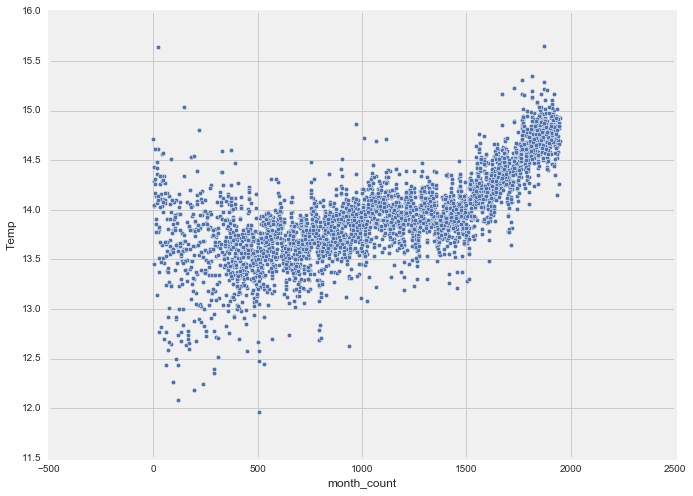

In [17]:
df.plot.scatter('month_count', 'Temp', figsize=(10,8));

My next chart shows the distribution of temperature readings in the dataset. It appears to be pretty close to a normal distribtion but with a slight hump on the right, signifying that there were more above average readings.

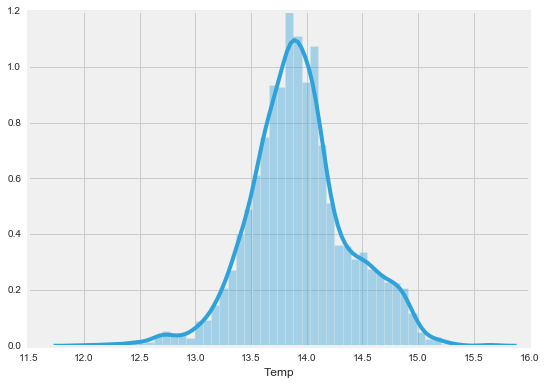

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(df.Temp)

The last chart I created was a pairplot. There wasn't much of anything new to discern here as the majority of the data is categorical.

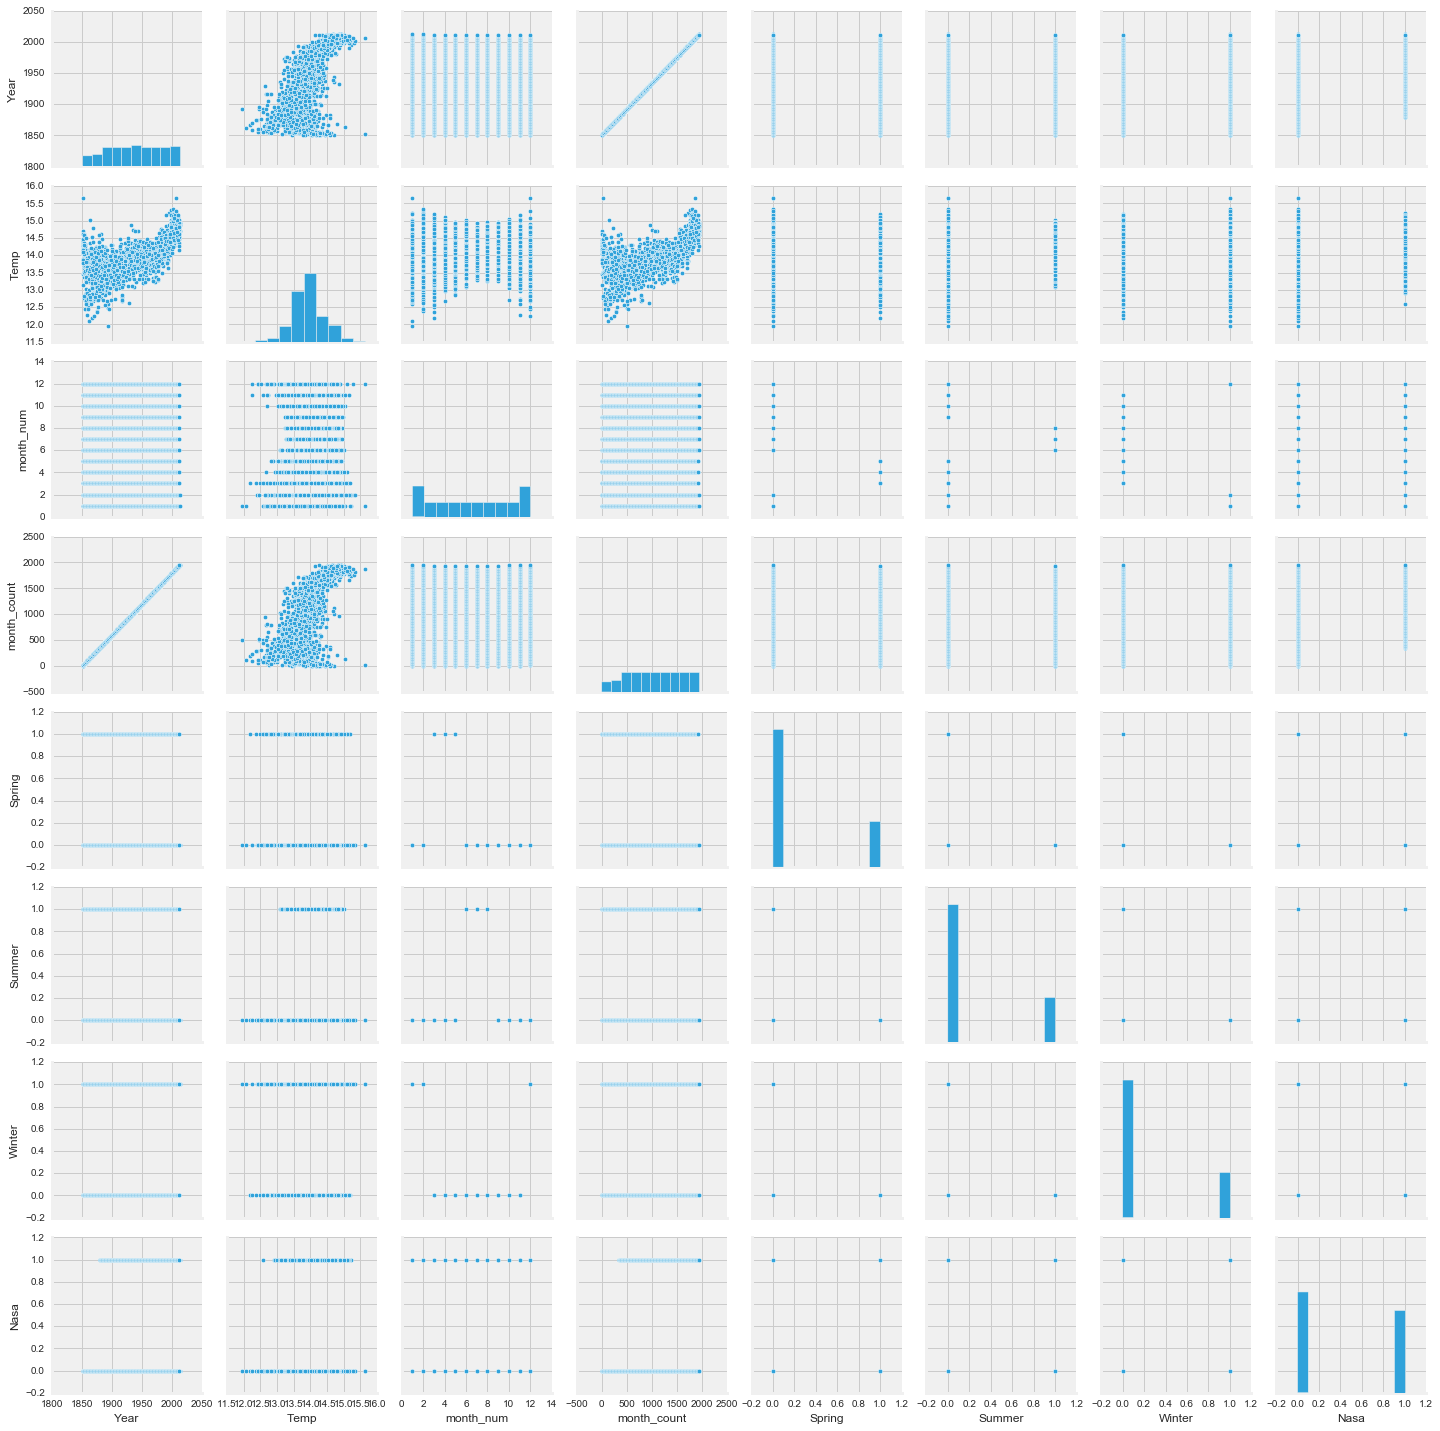

In [19]:
sns.pairplot(df)

With everything in the data looking ok on the surface I decided to build a regression model using all of the data up to the supposed beginning of the temperature "plateau" outlined in the case. Once I had settled on a regression model I planned on testing it against the data from 2003 to 2013 to see where the past decade of temperature readings fit within the preceding 152 years of data readings.

In [20]:
df_train = df[df.Year < 2003]
df_train.count()

Year           3300
data_set       3300
Month          3300
Temp           3300
month_num      3300
month_count    3300
Season         3300
Spring         3300
Summer         3300
Winter         3300
Nasa           3300
dtype: int64

For the first regression trial I included all of the catergorical dummies to set a baseline R-squared for all of the data. I then reran with each set of dummies removed to see if it had an impact on the R-squared output.

In [21]:
model = ols(data=df_train, formula='Temp ~ month_count + Nasa + Spring + Summer + Winter')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     448.6
Date:                Tue, 12 Apr 2016   Prob (F-statistic):               0.00
Time:                        22:26:27   Log-Likelihood:                -794.74
No. Observations:                3300   AIC:                             1601.
Df Residuals:                    3294   BIC:                             1638.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      13.3761      0.016    860.998      0.000        13.346    13.407
month_count     0.0005   1.11e-05     45.487      0.000         0.000     0.001
Nasa            0.0328      0.011      2.996      0.003         0.011     0.054
Spring         -0.0622      0.015     -4.099      0.000        -0.092    -0.032
Summer          0.0354      0.015      2.332      0.020         0.006     0.065
Winter         -0.0362      0.015     -2.383      0.017        -0.066    -0.006
==============================================================================
Omnibus:                      281.600   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1189.467
Skew:                           0.320   Prob(JB):                    5.13e-259
Kurtosis:                       5.871   Cond. No.                     4.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model = ols(data=df_train, formula='Temp ~ month_count + Spring + Summer + Winter')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     557.2
Date:                Tue, 12 Apr 2016   Prob (F-statistic):               0.00
Time:                        22:26:29   Log-Likelihood:                -799.23
No. Observations:                3300   AIC:                             1608.
Df Residuals:                    3295   BIC:                             1639.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      13.3850      0.015    876.644      0.000        13.355    13.415
month_count     0.0005   1.09e-05     46.687      0.000         0.000     0.001
Spring         -0.0622      0.015     -4.092      0.000        -0.092    -0.032
Summer          0.0354      0.015      2.330      0.020         0.006     0.065
Winter         -0.0361      0.015     -2.378      0.017        -0.066    -0.006
==============================================================================
Omnibus:                      261.572   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1134.758
Skew:                           0.266   Prob(JB):                    3.90e-247
Kurtosis:                       5.823   Cond. No.                     4.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model = ols(data=df_train, formula='Temp ~ month_count')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     2153.
Date:                Tue, 12 Apr 2016   Prob (F-statistic):               0.00
Time:                        22:26:30   Log-Likelihood:                -822.64
No. Observations:                3300   AIC:                             1649.
Df Residuals:                    3298   BIC:                             1661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      13.3690      0.012   1099.986      0.000        13.345    13.393
month_count     0.0005    1.1e-05     46.399      0.000         0.000     0.001
==============================================================================
Omnibus:                      237.579   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1074.697
Skew:                           0.180   Prob(JB):                    4.29e-234
Kurtosis:                       5.772   Cond. No.                     2.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the regression with only the month count reduced the R-squared by just .01 I decided that the dummy variables did not improve the model enough to be included. With a usable model in hand I took a quick look at the distribution of residuals and the QQ plot to see if anything was out of the ordinary. The residuals looked pretty close to normal and the QQ showed some light tailing but neither were extreme enough to make me doubt the model's quality.

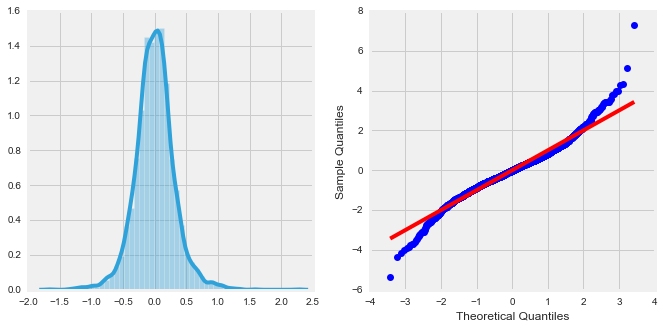

In [24]:
residuals = result.resid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.distplot(residuals, ax=axes[0]);
sm.qqplot(residuals, fit=True, line='s', ax=axes[1]);

With the model all set I used it to create a prediction column to add to our 2003-2013 test data. 

In [25]:
df['Prediction'] = result.predict(df)
df['Prediction_vs_Actual'] = df['Temp'] - df['Prediction']

In [26]:
test_df = df[df.Year >= 2003]
test_df.sample(5)

,Year,data_set,Month,Temp,month_num,month_count,Season,Spring,Summer,Winter,Nasa,Prediction,Prediction_vs_Actual
257,2003,nasa,Feb,14.730,2,1826,winter,0,0,1,1,14.30028,0.42972
1333,2007,nasa,Oct,14.790,10,1882,fall,0,0,0,1,14.32884,0.46116
1296,2006,met,Aug,14.730,8,1868,summer,0,1,0,0,14.32170,0.40830
1061,2003,nasa,Aug,14.870,8,1832,summer,0,1,0,1,14.30334,0.56666
967,2003,met,Jun,14.707,6,1830,summer,0,1,0,0,14.30232,0.40468


A describe function of the new Prediction vs Actual temperature column was the first piece of concrete evidence that the data supports the case that global warming does exist. The mean difference between the predicted and actual values was .45 degrees, meaning that on average the global temperature was .45 degrees Celsius higher than would be expected by the model.

In [27]:
test_df['Prediction_vs_Actual'].describe()

count    244.000000
mean       0.442134
std        0.187186
min       -0.210360
25%        0.330873
50%        0.452725
75%        0.562668
max        1.328750
Name: Prediction_vs_Actual, dtype: float64

Next I plotted the these Predicted vs Actual difference to see if the distribution was normal, which it did appear to be.

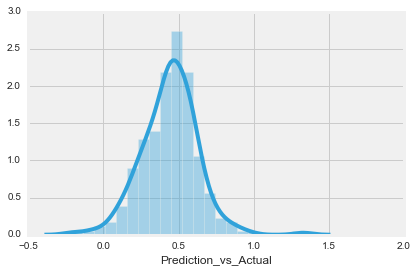

In [28]:
sns.distplot(test_df.Prediction_vs_Actual)

# Conclusion

Ultimately, the data appears to show that for the supposed 10 year temperature plateau, global average temperatures were actually higher than expected when tested against Nasa and Met's recorded history of world temperatures. The model itself showed that over time the global average temperature has been increasing and in the past decade has been increasing at an accelerated pace. Of course this assumes that our model is accurate which it may not entirely be. At an R-squared of .395 the model tells us that for our data, the passage of time (in this case months), only explains 39.5% of the variation in temperature. Additionally I have concerns about some of the older temperature readings. The scatterplot of temperatures clearly showed a decrease in variance the closer to the present the data was. This could be because of an actual decrease in temperature variance or more likely that the respective agencies began to more accurately gauge temperature as technology improved. If true this would have an adverse effect on the model's predictive abilities. However going by just the information we have, it is clear that there has been global warming occuring over the past decade.